In [1]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D,  BatchNormalization, Add, Activation, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D
from keras.optimizers import Adam
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential


In [2]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
# Path to the main flower dataset folder
dataset_folder = 'Crops\Tomato'

In [4]:
# List of class names
class_names = ['Bacterial_spot','Early_blight','Healthy','Late_blight','Leaf_Mold','Septoria_leaf_spot','Spider_mites Two-spotted_spider_mite','Target_Spot','Tomato_mosaic_virus','Tomato_Yellow_Leaf_Curl_Virus']


In [5]:
# Load and preprocess images
data = []
labels = []

In [6]:
for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_folder, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        img = img.resize((32, 32))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_idx)

In [7]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split the dataset into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)



In [9]:
# Print the shapes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (5465, 32, 32, 3)
y_train shape: (5465,)
x_val shape (1367, 32, 32, 3)
y_val shape : (1367,)
x_test shape: (1708, 32, 32, 3)
y_test shape: (1708,)


In [10]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [11]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)


In [13]:

from tensorflow.keras import layers, Sequential
from keras import applications 
from tensorflow.keras.optimizers import SGD
from keras.layers  import Input
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam


In [14]:
#custom Model
customModel = Sequential()
customModel=Sequential(
    [
        layers.Conv2D(512,3,input_shape=(32,32,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation='softmax'),
    ]
)

In [15]:
customModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
customModel.summary()
     


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 512)       14336     
                                                                 
 batch_normalization (Batch  (None, 32, 32, 512)       2048      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       1179904   
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       590080    
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 256)      

In [16]:
y_train.shape

(5465, 10)

In [17]:
history = customModel.fit(
    x_train,y_train,
    epochs=35,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])



Epoch 1/35
171/171 [==============================] - ETA: 0s - loss: 1.4487 - accuracy: 0.4924

c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


171/171 [==============================] - 208s 1s/step - loss: 1.4487 - accuracy: 0.4924 - val_loss: 4.9243 - val_accuracy: 0.1097
Epoch 2/35
171/171 [==============================] - 174s 1s/step - loss: 0.8990 - accuracy: 0.6807 - val_loss: 7.0951 - val_accuracy: 0.1097
Epoch 3/35
171/171 [==============================] - 174s 1s/step - loss: 0.7380 - accuracy: 0.7526 - val_loss: 2.6827 - val_accuracy: 0.3980
Epoch 4/35
171/171 [==============================] - 188s 1s/step - loss: 0.6424 - accuracy: 0.7828 - val_loss: 1.1279 - val_accuracy: 0.6606
Epoch 5/35
171/171 [==============================] - 181s 1s/step - loss: 0.5410 - accuracy: 0.8141 - val_loss: 1.7393 - val_accuracy: 0.5150
Epoch 6/35
171/171 [==============================] - 195s 1s/step - loss: 0.4945 - accuracy: 0.8311 - val_loss: 0.7534 - val_accuracy: 0.7337
Epoch 7/35
171/171 [==============================] - 224s 1s/step - loss: 0.4665 - accuracy: 0.8426 - val_loss: 1.4308 - val_accuracy: 0.5903
Epoch 8/35

In [18]:
val_loss, val_acc = customModel.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


43/43 [==============================] - 11s 246ms/step - loss: 0.3424 - accuracy: 0.9203
Validation accuracy :  0.9202633500099182


In [19]:
import matplotlib.pyplot as plt

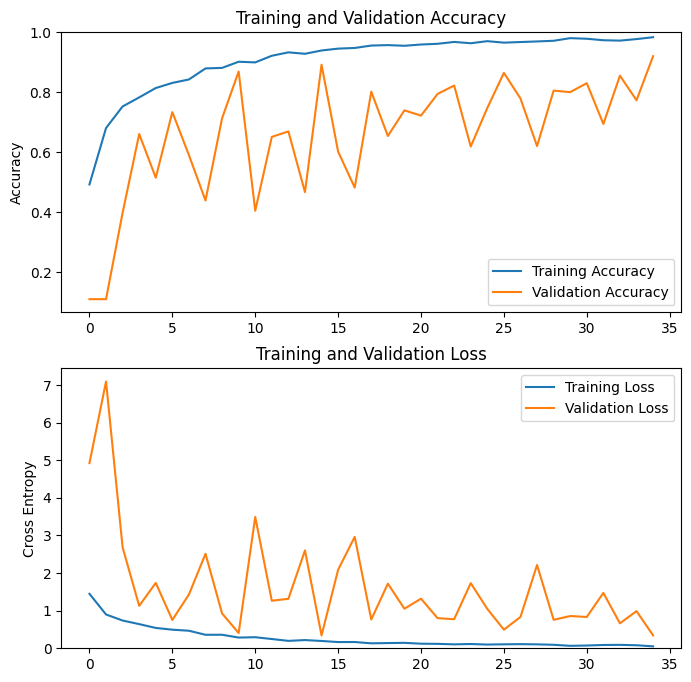

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [21]:
import pandas as pd
import seaborn as sns
    

43/43 [==============================] - 11s 253ms/step


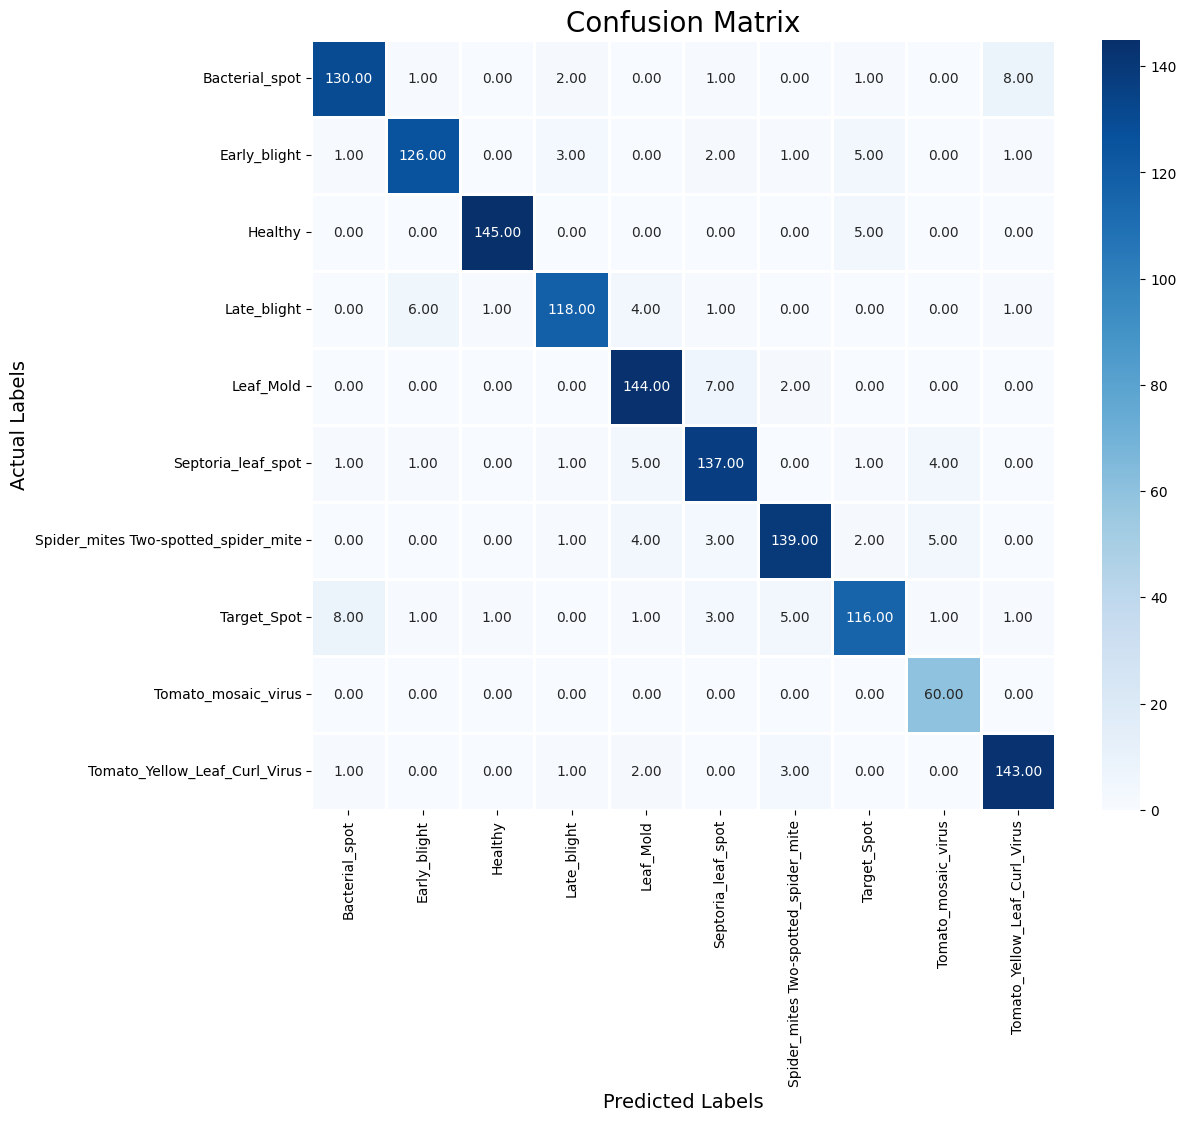

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       143
           1       0.93      0.91      0.92       139
           2       0.99      0.97      0.98       150
           3       0.94      0.90      0.92       131
           4       0.90      0.94      0.92       153
           5       0.89      0.91      0.90       150
           6       0.93      0.90      0.91       154
           7       0.89      0.85      0.87       137
           8       0.86      1.00      0.92        60
           9       0.93      0.95      0.94       150

    accuracy                           0.92      1367
   macro avg       0.92      0.92      0.92      1367
weighted avg       0.92      0.92      0.92      1367



In [22]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))


In [23]:
score = customModel.evaluate(x_test, y_test)
     




54/54 [==============================] - 13s 250ms/step - loss: 0.3514 - accuracy: 0.9174


In [24]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.351377934217453
Test accuracy: 0.9174473285675049


In [25]:
customModel.save('Tomato_Saved_Model')

INFO:tensorflow:Assets written to: Tomato_Saved_Model\assets


INFO:tensorflow:Assets written to: Tomato_Saved_Model\assets


In [26]:
import tensorflow as tf
import numpy as np
from PIL import Image
import tensorflow as tf
model = tf.keras.models.load_model('Tomato_Saved_Model')

In [27]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    
    # Convert to RGB in case the image has an alpha channel
    img = img.convert('RGB')
    
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [28]:
# List of class names
class_names = ['Bacterial_spot','Early_blight','Healthy','Late_blight','Leaf_Mold','Septoria_leaf_spot','Spider_mites Two-spotted_spider_mite','Target_Spot','Tomato_mosaic_virus','Tomato_Yellow_Leaf_Curl_Virus']

In [ ]:
# Predict the class
image_path = 'flowers/rose/12240303_80d87f77a3_n.jpg'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)
